#### 讀取需要的函式庫

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import clear_output
from wordcloud import WordCloud
from PIL import Image
from func import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import jieba
import sys
import re
import os
# re -> \d for number, \s for any space (\t\r\n...) 

#### 讀取資料夾中的資料

In [2]:
#path = '../../107-1PythonSampleCode/week_5/task_5/*.txt'
path = './second/*.txt'
title, data = readdir(path)


Number of files : 17


#### 顯示部份資料內容

In [3]:
for i in range(len(data)):
    print('----Document : {0}----'.format(title[i]))
    print(data[i][:10], '...', data[i][-10:-1], sep='\n', end='\n\n')

----Document : second01----
﻿
1.	鴻夏戀一
...
7000億日圓。

----Document : second02----
﻿2.	鴻夏戀！代價
...
持鴻海併購夏普。

----Document : second03----
﻿3.	鴻夏戀對日本
...
力將逐漸被削弱。

----Document : second04----
﻿4.	日本產業史上
...
普第一大股東


----Document : second05----
﻿5.	鴻夏戀馬拉松
...
鴻海均不予回應。

----Document : second06----
﻿6.	郭董質押17
...
至31.75％。

----Document : second07----
﻿7.	鴻夏添變數 
...
不會再轉趨嚴苛。

----Document : second08----
﻿8.	鴻夏戀要快 
...
面板的供應能力。

----Document : second09----
﻿9.	鴻夏戀若成 
...
新一代面板產品。

----Document : second10----
﻿10.	郭台銘赴曼
...
傍晚才陸續撤離。

----Document : second11----
﻿11.	鴻夏戀上軌
...
元至81.7元。

----Document : second12----
﻿12.	鴻海×夏普
...
睜大眼睛瞧著呢。

----Document : second13----
﻿13.	郭董的野望
...
行更密切的合作。

----Document : second14----
﻿14.	堅娶夏普 
...
太陽能發電標案。

----Document : second15----
﻿
15.	夏普兩
...
客戶」有所助益。

----Document : second16----
﻿16.	鴻海若吃夏
...
神？還有待觀察。

----Document : second17----
﻿17.	分析：日本
...
生枝，拭目以待。



#### 新增詞彙至自定義詞庫，並匯入該詞庫
* savetofile(path, list_like_data)
* example for list_like_data:
  * [['來台']] : 完整 '來台' 字串被存入字典中
  * ['來台'] :　'來台' 視為獨立字元，存入 '來' '台' 於字典中 

In [4]:
savetofile('./dict.txt', [['來台']])  # 完整字串　'來台'　被存入字典中
jieba.load_userdict('./dict.txt')

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 1.036 seconds.
Prefix dict has been built succesfully.


#### 新增詞彙至自定義停止詞彙中

In [5]:
stopwords = ['一','二','三','四','五','六','用','淨','利','值','前','據','談','自','至','曾','出',
            '合','最','供','而','個','很','得','達','家','進','所','夏','若','邱','但','中','可',
            '他','我','列','將','對','之','率','已','由','佔','本','日','月','年','另','故','於',
            '較','請','再','經','也','在','依','到','等','或','大','認列','不僅','讓','相關','最終',
            '把','沒','及','過去','認為','為','按','比','仍','係','後','及與','以','時','該','的',
            '並','更','就','註','有','事','來','不','從','堺','權','從','卻','說','要','今','度',
            '手','才','又','其','長','了','百','億','元','例如','可能','由於','因此','土城','一份',
            '上午','這份','多','赴','和','與','是','約','就是','只是','但是','如果','附註','部分',
            '事項','各位','品牌','集團','幅度','資產','新','台幣','日圓','億日圓','機構','面板','日元',
            '企業','報導','媒體','目前','提案','經營','實地','大阪','億元','以及','代工','一步','第二',
            '雙方','方案','分析','接受','成為','事業','目前','高橋','董事','營業','受到','提供','使用',
            '本年','說明','現金','成本','營業外','收入','結轉','分攤','其他','影響財務','詳合','結果',
            '不是','是否','最高','記者','超過','兩家','主幹','我們','除了','自己','立刻','','日本',
            '之間','不過','今天','然而','此外','工廠','預測','如下','之一','附註','附','註','其中',
            '因為','查核','報告增加','會計','相對','仟元','金額','權益','能力利益','股東','合理性',
            '假設','無形','上','開關鍵','模型','支出','控制','計算','資金評估','報告','因應','仟元',
            '金額','權益','假設','無形','上','模型','支出','控制','計算資金','評估','人次','重大',
            '資訊','總額','民國','估計','一副','公司','年度','包括','正確性','正','確性','減損','共為',
            '預估','預算','去年同期','應該','雖然','下午','要求','一樣','一家','維持','公開','整體',
            '表示','特性','市場','科目','發生','年本','重要','判斷','主要','流量','意見','關鍵','同期',
            '評價','正確','地區','總資產','執行','程序','測試','稅後淨利','股份有限公司','蘋果','鴻海',
            '夏普','郭台銘','鴻夏戀','iPhone','1','2','3','4','5','6','7','8','9','0','NT','2012',
            '10','三星','供應商','INCJ','案','LG','會','下','買','電子','清單','向','都','郭董',
            '能力','進','廠','內','購','併','這','看','人','被','能','外界','指出','五日','不同','陷入',
            '出現','一年','什麼','安倍','這個','可以','一個','同時','去年','部門','二月','這是','月底',
            '完成','財務','今年','階段','子公司','條件','引述','召開','擁有','有助','持有','進入','旗下',
            '已經','入座','罩','業務','顯示','尺寸','萬張','取得','高達','持續','進行','人士','提出',
            '社長','加工','內容','總部','沒有','加上','決定','群創','最大','四年','代廠','做','鴻','高',
            '市','不會','傳出','文件','客戶超過','SDP','JDI','IGZO','Display','WitsView','NHK',
            '12','7000','3500','2015','2016','25','30','000','29']
puncs_Full = '！？｡＂＃＄％＆＇（）()＊＋，－／：；＜＝＞＠［＼］$＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'
puncs_Half = "!?.#$%&'()*+,-/:;<=>@[]^_{}|~\\\""
savetofile('./stopword.txt', [stopwords, puncs_Full, puncs_Half])

In [6]:
stopword = readdir('./stopword.txt')[1][0].split('\n')
stopword.append('\n')
stopword[0:10]


Number of files : 1


['一', '二', '三', '四', '五', '六', '用', '淨', '利', '值']

#### 利用 jieba 對文件進行斷字，並統計字詞頻率，顯示前十名資料

In [7]:
wordDictionary = []
for i in range(len(data)):
    seg_list = jieba.cut(data[i], cut_all=False)
    seg_list = list(seg_list)
    wordDict = {}
    for w in seg_list:
        if (w not in stopword) and (w not in puncs_Full) and (w not in puncs_Half):
            if w in wordDict:
                wordDict[w] = wordDict[w] + 1
            else:
                wordDict[w] = 1
    wordDictionary.append(wordDict)
    print('Number of word in document ({0}) : '.format(title[i]), len(wordDict))
    sort = sorted(wordDict.items(), key=lambda x: x[1], reverse = True)
    print(sort[0:10])
    data[i] = ','.join(jieba.cut(data[i], cut_all=False))

Number of word in document (second01) :  259
[('\r\n', 54), ('合作', 9), ('重整', 7), ('股權', 4), ('規劃', 4), ('土界', 4), ('入股', 3), ('未來', 3), ('投資', 3), ('參與', 3)]
Number of word in document (second02) :  237
[('\r\n', 28), ('負債', 6), ('做好', 3), ('DD', 3), ('AMOLED', 3), ('財報', 3), ('日商', 3), ('專家', 3), ('黑洞', 2), ('你', 2)]
Number of word in document (second03) :  283
[('\r\n', 12), ('技術', 10), ('整合', 6), ('全球', 5), ('產能', 5), ('OLED', 5), ('應用', 4), ('模式', 4), ('LTPS', 3), ('未來', 3)]
Number of word in document (second04) :  136
[('\r\n', 58), ('收購', 3), ('2013', 3), ('追', 3), ('蹤', 3), ('聯日', 2), ('《', 2), ('第一', 2), ('全球', 2), ('失敗', 2)]
Number of word in document (second05) :  136
[('\r\n', 23), ('消息', 6), ('簽約', 4), ('高山', 4), ('回應', 4), ('不予', 4), ('俊明', 4), ('幹部', 4), ('狀況', 3), ('貸款', 3)]
Number of word in document (second06) :  84
[('設質', 6), ('\r\n', 6), ('17', 4), ('持股', 4), ('分行', 3), ('股票', 3), ('套現', 2), ('押', 2), ('張數', 2), ('總', 2)]
Number of word in document (second07) :  13

#### 顯示各文件低於閥值 (limit) 的字詞

In [8]:
limit = 0
wordsperdocument = 50
for i in range(len(data)):
    count = 0
    print('----Document : {0}----'.format(title[i]))
    for ind, value in wordDictionary[0].items():
        if (value <= limit) & (count != wordsperdocument):
            count += 1
            print(ind, end = ', ')
    print()

----Document : second01----

----Document : second02----

----Document : second03----

----Document : second04----

----Document : second05----

----Document : second06----

----Document : second07----

----Document : second08----

----Document : second09----

----Document : second10----

----Document : second11----

----Document : second12----

----Document : second13----

----Document : second14----

----Document : second15----

----Document : second16----

----Document : second17----



#### 利用 wordDictionary 移除出現次數低於閥值 (limit) 的字詞，並顯示部份結果

In [9]:
for i in range(len(data)):
    for key, value in wordDictionary[0].items():
        if value <= limit:
            data[i] = data[i].replace(key, '')
    print('document :', title[i])
    print(data[i][:50], '...', data[i][-50:-1], sep='', end='\n\n')

document : second01
﻿,
,1,.,	,鴻夏戀,一波三折, ,回顧,4,年,全紀錄,
,日本,媒體,報導,，,夏普,...子公司,，,鴻海,集團,對,夏普,提出,的,重整,方案,，,規模,達,到,7000,億日圓,。,

document : second02
﻿,2,.,	,鴻夏戀,！,代價,1,兆,日圓, ,蘋果,金援,機會,大,
,鴻夏戀,再生,波瀾,...了,韓廠,，,就屬,日商,夏普,擁有,面板,頂尖,技術,，,因此,支持,鴻海,併,購,夏普,。,

document : second03
﻿,3,.,	,鴻夏戀,對,日本,JDI,衝擊,最大, ,對群,創影響,待,觀察,
,峰,迴,路轉...被迫,選擇,與,垂直,鏈廠,商,合作,，,其產業,話,語權,與,影響,力將,逐漸,被,削弱,。,

document : second04
﻿,4,.,	,日本,產業史,上,第一回, ,鴻海,收購,夏普,成局,
,苦戀,4,年,，,周折,...
,2012,/,3,/,28,
,聯日,抗韓,！,鴻海,成為,夏普,第一,大股,東,
,

document : second05
﻿,5,.,	,鴻,夏戀馬拉松,，,傳,夏普,社長,與,郭,董談,十小時,
,夏普,社長,高橋,興...清,夏普,負債,與,財務,狀況,。,對,於,上述,報導,與,消息,，,鴻海,均,不予,回應,。,

document : second06
﻿,6,.,	,郭,董質,押,17,萬張,鴻海,套現,
,郭台銘,買,夏普,真心,可鑑,，,為,籌...萬張,，,以,郭董,總,持股,197.39,萬,張估,，,質設,比拉,高至,31.75,％,。,

document : second07
﻿,7,.,	,鴻夏添,變數, ,外資,仍樂觀,結親,
,「,鴻夏戀,」,好事多磨,延後簽,約,，...,的,或,有,負債,，,機率,應該,不太高,，,因此,，,收購,條件,不會,再,轉趨,嚴苛,。,

document : second08
﻿,8,.,	,鴻夏戀,要,快, ,爭蘋果,OLED,第二,供應商,
,鴻夏戀,進展,腳步,要,加...,，,鴻海,投資,夏普,後,，,可,鞏固,日後對,蘋果,iPhone,面板,的,供應,能力,。,

document : second09
﻿,9,.,	,

#### 移除所有標點符號、非中文英文數字之資料

In [10]:
for i in range(len(data)):
    data[i] = re.sub('[^\u4e00-\u9fff,]', '', data[i])
#[^\u4e00-\u9fff A-Za-z0-9]

#### 印出部份斷字結果

In [11]:
for i in range(len(data)):
    print('document :', title[i])
    print(data[i][:20], ' ... ', data[i][-20:-1], sep='', end='\n\n')

document : second01
,,,,,鴻夏戀,一波三折,,回顧,,年 ... 重整,方案,,規模,達,到,,億日圓,

document : second02
,,,,鴻夏戀,,代價,,兆,日圓,,蘋 ... 術,,因此,支持,鴻海,併,購,夏普,

document : second03
,,,,鴻夏戀,對,日本,,衝擊,最大, ... 語權,與,影響,力將,逐漸,被,削弱,

document : second04
,,,,日本,產業史,上,第一回,,鴻海 ... ,,鴻海,成為,夏普,第一,大股,東,

document : second05
,,,,鴻,夏戀馬拉松,,傳,夏普,社長 ... 導,與,消息,,鴻海,均,不予,回應,

document : second06
,,,,郭,董質,押,,萬張,鴻海,套現 ... ,,萬,張估,,質設,比拉,高至,,,

document : second07
,,,,鴻夏添,變數,,外資,仍樂觀,結 ... ,,收購,條件,不會,再,轉趨,嚴苛,

document : second08
,,,,鴻夏戀,要,快,,爭蘋果,,第二 ... 日後對,蘋果,,面板,的,供應,能力,

document : second09
,,,,鴻夏戀,若成,,外電,,鴻海,將 ... 二極體,,,,等,新一代,面板,產品,

document : second10
,,,,郭台銘,赴,曼谷,,實地,查核, ... 一直,守候,到,傍晚,才,陸續,撤離,

document : second11
,,,,鴻夏戀,上,軌道,,鴻海,,夏普 ... 低,,目前,股價,下挫,,元至,,元,

document : second12
,,,,鴻海,,夏普,,不,完美,交易, ... ,大家,都,在睜大,眼睛,瞧,著,呢,

document : second13
,,,,郭董,的,野望,,,鴻海,買,夏 ... 為,基礎,,進行,更,密切,的,合作,

document : second14
,,,,堅娶,夏普,,鴻海,想,擺脫,代 ... ,已,拿下,印度,太陽能,發電,標案,

document : second15
,,,,,夏普,兩大傳家,寶,,鴻海,非 ... 的,,其他,重要,客戶,,有所,助益,

document :

#### 初始化 TFIDF 物件，用以計算 tfidf

In [12]:
tfidf_vectorizer = TfidfVectorizer(max_df = 1, min_df = 0, analyzer = 'word'
                                   , stop_words = stopword, max_features = 10000)
#tfidf_vectorizer = CountVectorizer(stop_words = stopword)

#### 顯示初始化時輸入的停止詞彙 

In [13]:
print(tfidf_vectorizer.get_stop_words())

frozenset({'', '|', '之日', '意見', '會計師', '夏普是', '以', '並訂', '請', '一步', '無', '之補', '之輸', '公司', 'SDP', '共為', '買', '三家', '一環', '可能', '能力', '一個', '〿', '日元', '本會', '不僅', '並不重', '包括', '利', '雖然', '依部', '之暴', '〞', '二親', '今', '被', '並就', '＃', '我們', '任會', '@', '及', '引述', ')', '一套', '以及', '伍拾', '„', '不及', '入座', '之獨', '營業外', '安倍', '–', '分析', '並引', '之種', '〝', '一致', '不願', '中稱', '仟元及', '’', '黑衣', '﹏', '並應', '以來', '高', '並無', '一二年', '之旺', '進行', '要', '其中', '以進', '並視', '一勞永逸', '不想', '）', '月', '過去', '及與', '並重', '鴻', '之研', '上述', '四', '‧', '上千', '減損', '下午', '一九', '一千七百', '-', '供應將', '所', '並引進', '大', '一百', '五大', '2015', '做出', '仟元案', '評價', '可以', '堺', '‛', '=', '之壽命', '並未', '以護', '“', '日本', '取得', '品牌', '一早', '之水', '雙方', '這是', '6', '手', '不同', '30', '德拉', '伙伴', '下本', '人次', '他應', '以人', '不利素', '』', '郭董', '計師', '他們', '對夏普', '中明確', '出', '一手', '度', '什麼', '之持', '要求', '到', '不致', '出現', '9', '中劃', '之份', '仟及', '不少', '上面', '應該', '之會計', '清單', '住院', '.', '向', '才', '現金', '之庫', '以供', '讓', '〛', '之永', '評估', '開關鍵', ';', '〃', '沒有', 'I

#### 計算 TFIDF 詞頻矩陣

In [14]:
tfidf_matrix = tfidf_vectorizer.fit_transform(data)

/home/dongdong/.local/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:286: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['display', 'igzo', 'incj', 'iphone', 'jdi', 'lg', 'nhk', 'nt', 'sdp', 'witsview'] not in stop_words.
  sorted(inconsistent))


#### 顯示 TFIDF 詞頻矩陣大小

In [15]:
tfidf_matrix.shape

(17, 1841)

#### 顯示部份 TFIDF 詞頻矩陣中的字詞

In [16]:
words = tfidf_vectorizer.get_feature_names()
print(words[0:50])

['一七', '一下子', '一九九九年', '一二八', '一千五百', '一名', '一城', '一場', '一宗', '一攤', '一樁', '一比', '一片', '一種', '一筆', '一舉', '一般性', '一起', '一身', '一顆', '七七', '七五', '三九', '三五', '三個', '三億', '三兆台幣', '三六', '三大會', '三年', '三月', '三月底', '三筆', '三緘其口', '三菱', '三角', '三足鼎立', '三階段', '上升', '上周', '上極', '下一代', '下一個', '下令', '下來並', '下嫁', '下挫', '下滑', '下藥', '不久']


#### 顯示 TFIDF > 閥值 (limit) 的資料

In [17]:
limit = 0.1
wordsperdocument = 10
for i in range(len(data)):
    count = 0
    print('----Document : {0}----'.format(title[i]))
    for j in range(len(words)):
        if (tfidf_matrix[i,j] > limit) and (count != wordsperdocument):
            print(words[j], tfidf_matrix[i,j])
            count += 1

----Document : second01----
回顧 0.16169041669088843
將成 0.16169041669088843
抵達 0.16169041669088843
百年 0.16169041669088843
重整 0.5659164584181096
----Document : second02----
做好 0.24333213169614348
功課 0.16222142113076232
日商 0.24333213169614348
日文版 0.16222142113076232
正值 0.16222142113076232
法人 0.16222142113076232
突襲 0.16222142113076232
英文版 0.16222142113076232
追求 0.16222142113076232
錢媽媽 0.16222142113076232
----Document : second03----
互補 0.23354968324845654
其技術 0.15569978883230437
將透過 0.15569978883230437
影響力 0.15569978883230437
搭配 0.15569978883230437
立新 0.15569978883230437
結合 0.15569978883230437
缺乏 0.15569978883230437
逐步 0.15569978883230437
----Document : second04----
三個 0.12309149097933277
主動 0.12309149097933277
交集 0.12309149097933277
人為 0.12309149097933277
人難 0.12309149097933277
今早 0.12309149097933277
介入 0.12309149097933277
何緊 0.12309149097933277
傳真 0.12309149097933277
共主 0.12309149097933277
----Document : second05----
作業 0.26516504294495524
俊明 0.3535533905932737
信用 0.17677669529663684
知情 0.

#### 顯示文件相似性矩陣

In [18]:
dist = cosine_similarity(tfidf_matrix)
print(dist)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


#### 初始化 Count_vectorizer 物件，用以計算字頻

In [19]:
count_vectorizer = CountVectorizer(max_df = 1, min_df = 0, analyzer = 'word', stop_words = stopword)

#### 計算詞頻矩陣

In [20]:
count_matrix = count_vectorizer.fit_transform(data)

/home/dongdong/.local/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:286: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['display', 'igzo', 'incj', 'iphone', 'jdi', 'lg', 'nhk', 'nt', 'sdp', 'witsview'] not in stop_words.
  sorted(inconsistent))


#### 顯示詞頻矩陣大小 (理論上與 TFIDF 詞頻矩陣相同)

In [21]:
count_matrix.shape

(17, 1841)

In [22]:
count_matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
countframe = pd.DataFrame(count_matrix.toarray().T, index = count_vectorizer.get_feature_names(), columns = title)
countframe.head(10)

,second01,second02,second03,second04,second05,second06,second07,second08,second09,second10,second11,second12,second13,second14,second15,second16,second17
一七,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
一下子,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
一九九九年,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
一二八,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
一千五百,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
一名,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
一城,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
一場,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
一宗,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
一攤,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


#### 初始化 WordCloud 物件

In [24]:
font = r"/home/dongdong/.local/share/fonts/msjh.ttf"
mask = np.array(Image.open("./cloud.png"))
wordcloud = WordCloud(font_path=font, background_color = 'white', mask = mask)

#### 顯示整體詞庫的字詞頻率及前十名

(array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 <a list of 9 Text yticklabel objects>)

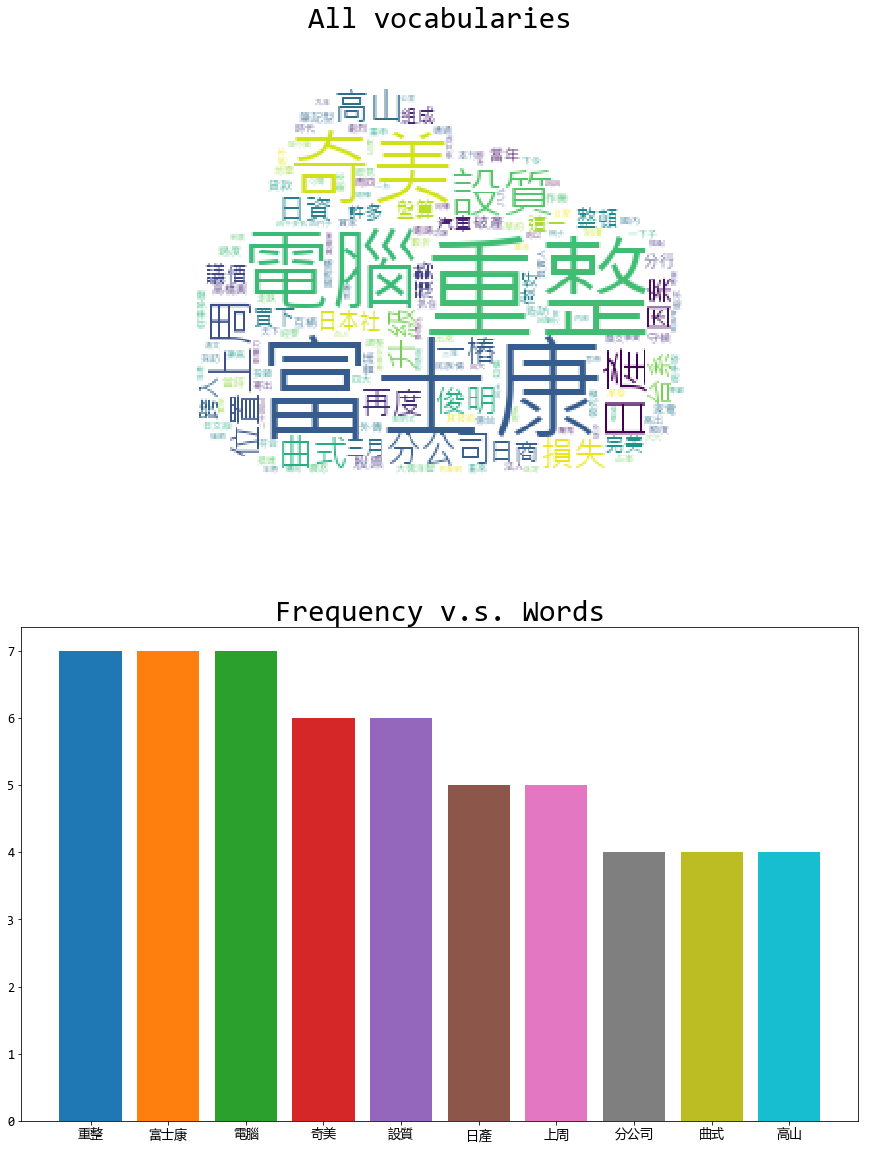

In [25]:
wordDict_key = count_vectorizer.get_feature_names()

wordDict = dict()
for i in range(len(wordDict_key)):
    wordDict_value = 0
    for j in range(len(data)):
        wordDict_value += count_matrix.toarray()[j].tolist()[i]
    wordDict[wordDict_key[i]] = wordDict_value

f = plt.figure(figsize=(15,20))
f.subplots_adjust(wspace = 0)

f.add_subplot(2, 1, 1)
wordcloud.fit_words(wordDict)
plt.title('All vocabularies', fontsize = 30)
plt.axis("off")
plt.imshow(wordcloud)

f.add_subplot(2, 1, 2)
sort = sorted(wordDict.items(), key=lambda x: x[1], reverse = True)
for i in range(10):
    plt.bar(sort[i][0], sort[i][1])
plt.title('Frequency v.s. Words', fontsize = 30)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

#### 顯示各個文件的字詞頻率及前十名

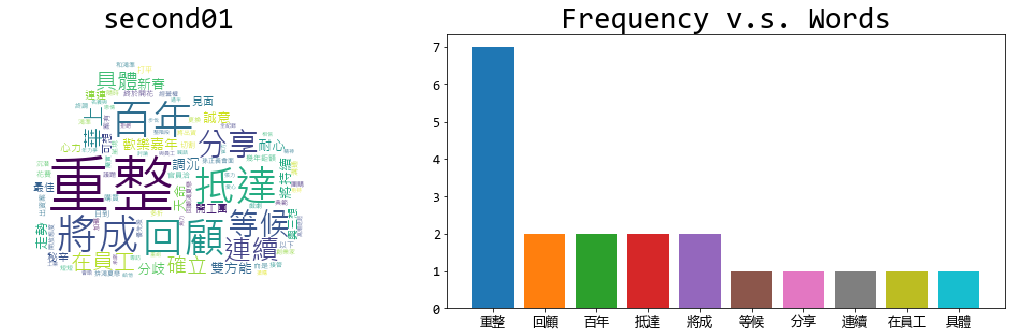

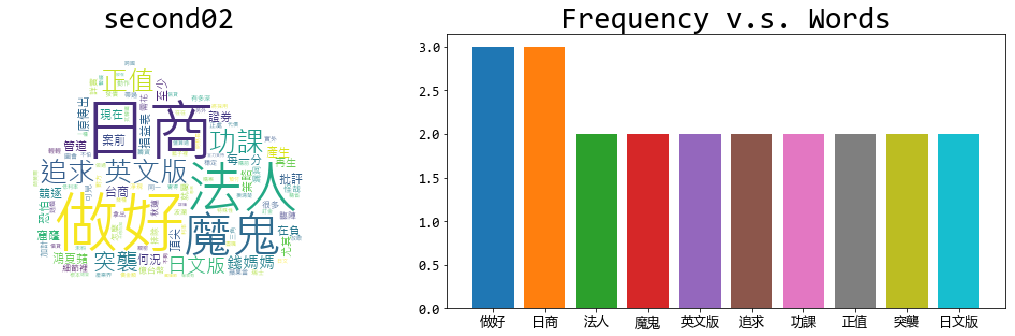

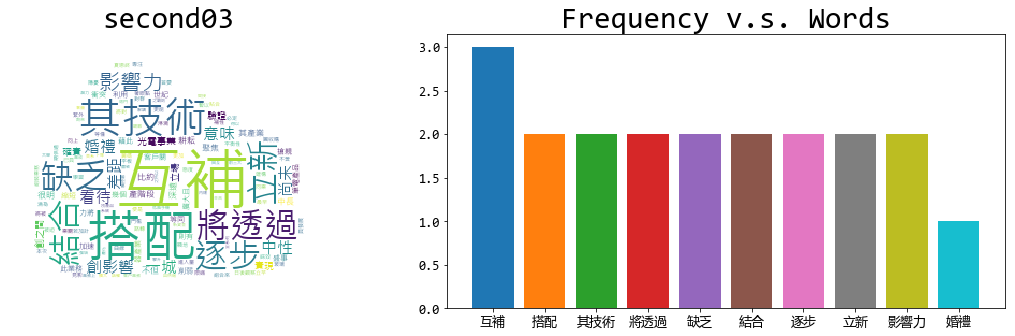

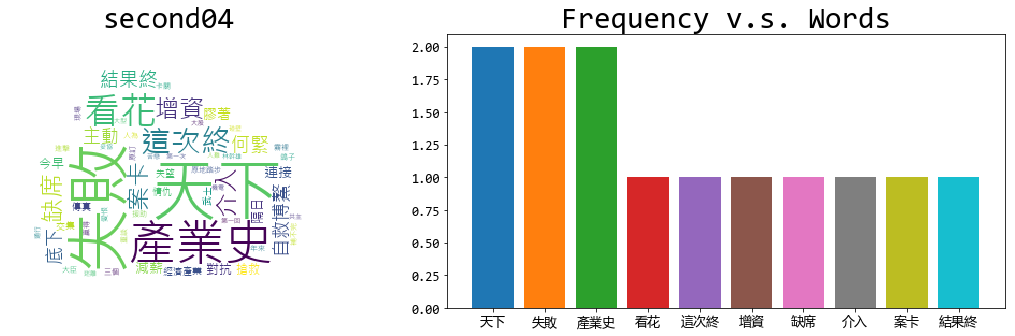

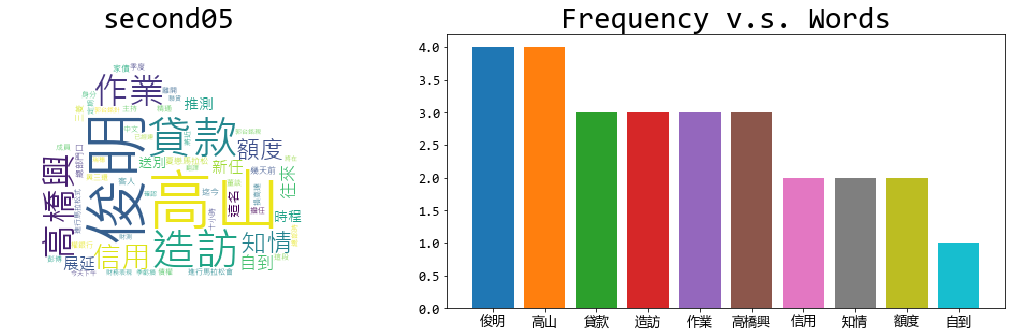

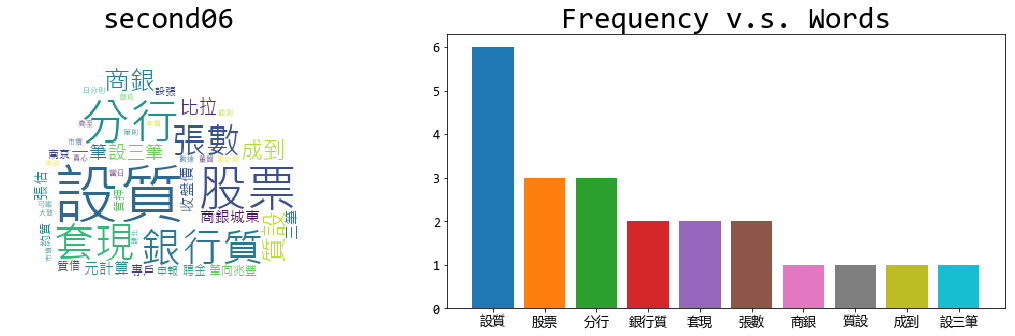

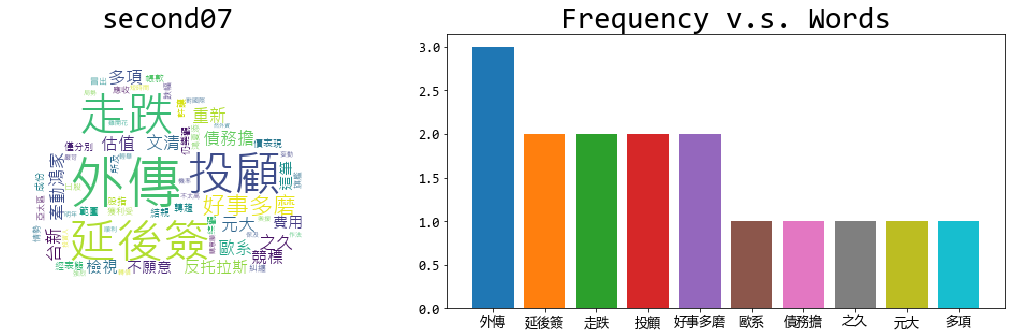

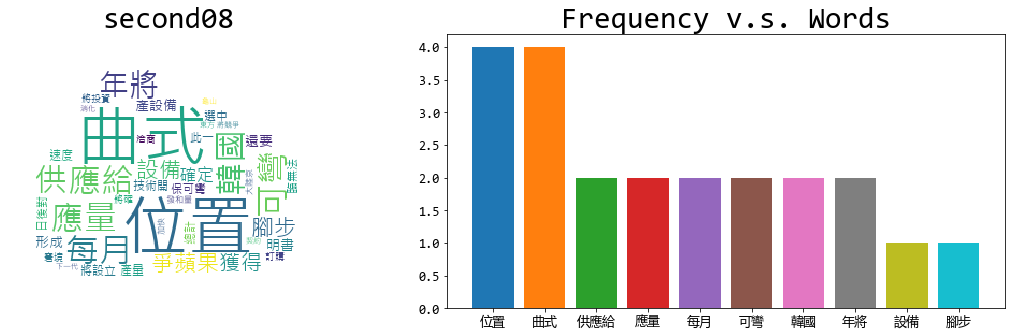

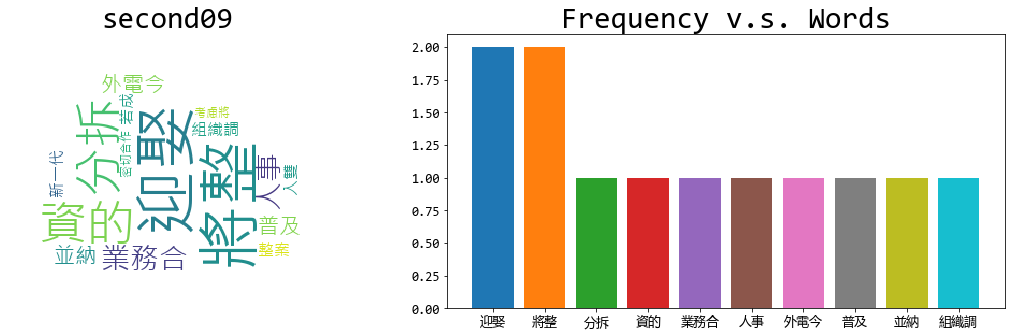

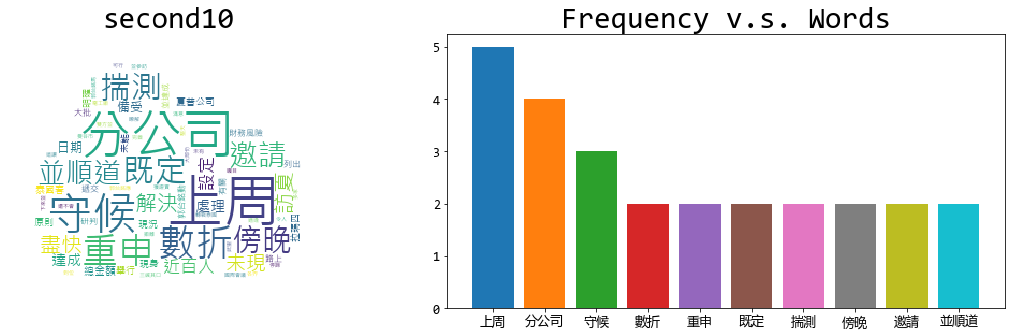

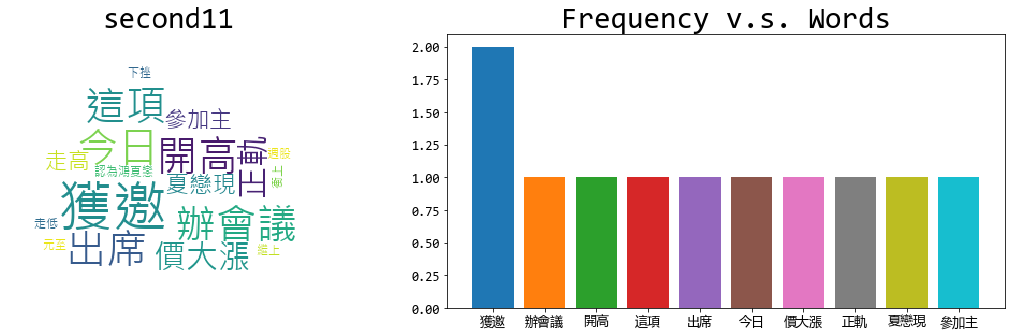

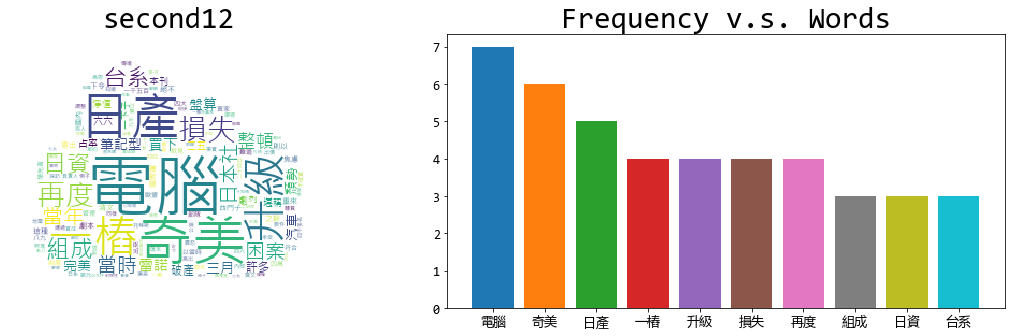

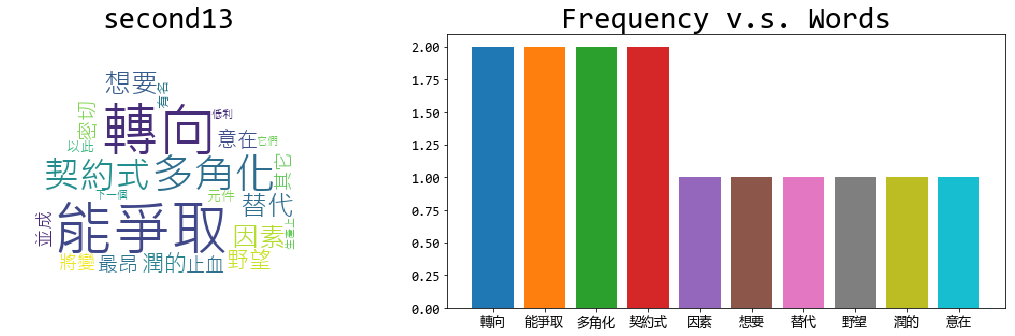

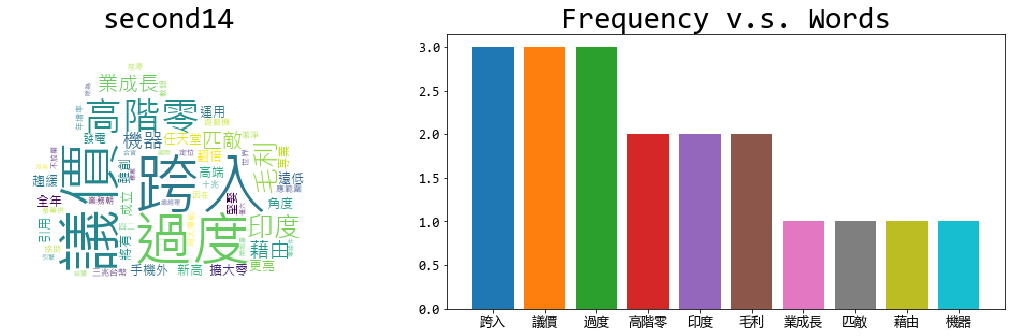

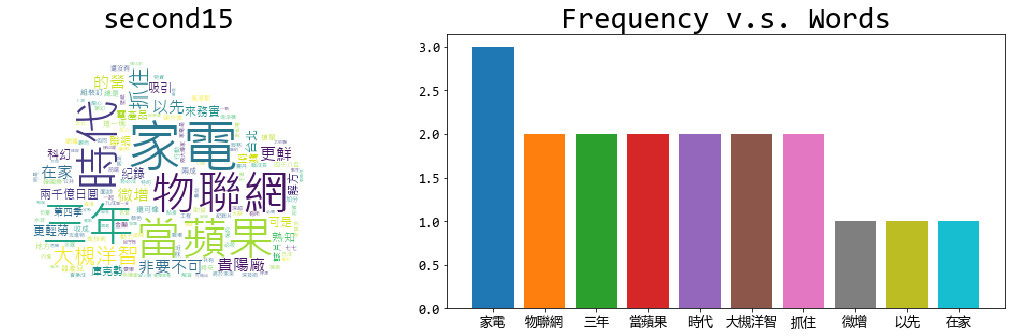

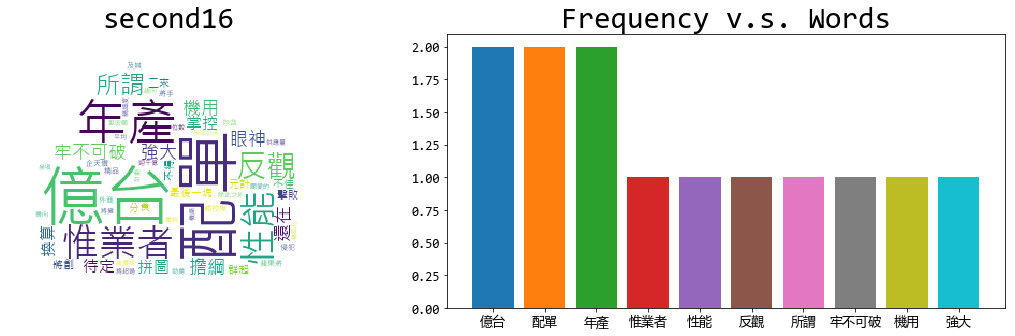

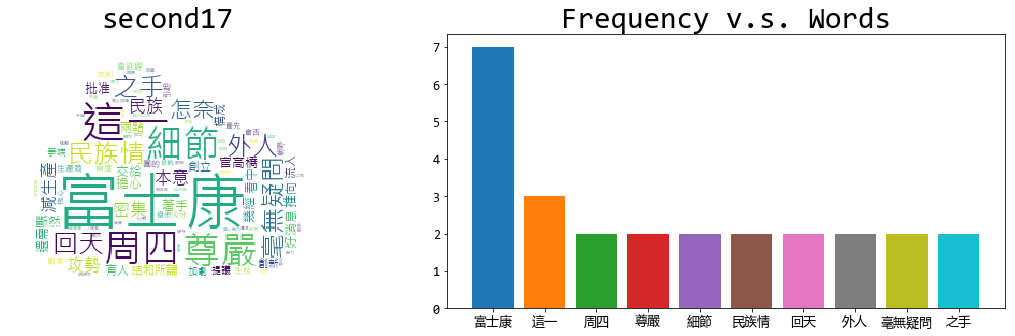

In [26]:
wordDict_key = count_vectorizer.get_feature_names()
plotind = 1
for i in range(len(data)):
    wordDict_value = count_matrix.toarray()[i].tolist()
    wordDict = dict()
    
    for j in range(len(wordDict_key)):
        if wordDict_value[j] != 0:
            wordDict[wordDict_key[j]] = wordDict_value[j]
            
    f = plt.figure(figsize=(20,6*len(data)))
    f.subplots_adjust(wspace = 0)

    f.add_subplot(len(data), 2, plotind)
    plotind += 1
    wordcloud.fit_words(wordDict)
    plt.title('{0}'.format(title[i]), fontsize = 30)
    plt.axis("off")
    plt.imshow(wordcloud)

    f.add_subplot(len(data), 2, plotind)
    plotind += 1
    sort = sorted(wordDict.items(), key=lambda x: x[1], reverse = True)
    for i in range(10 if (len(sort)>10) else len(sort)):
        plt.bar(sort[i][0], sort[i][1])
    plt.title('Frequency v.s. Words', fontsize = 30)
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)

![stock](鴻海股價.png)

#### 定義 addstopword 及 adddict 函式

In [27]:
def addstopword(data):
    stop = []
    if os.path.isfile('./stay.txt'):
        with open('./stay.txt', 'rb') as f:
                text = f.read()
                encode = chardet.detect(text)
        stay = list(map(str.strip, open('./stay.txt', 'r+', encoding=encode['encoding']).readlines()))
    else:
        stay = []
    length = len(data)
    index = 0
    value = ''
    tmp = ''
    while(index != length):
        clear_output()
        if data[index] not in stay:
            print(data[index])
            value = input('Add to stop word [y:stopword/n:stayword/q:quit]: ')
            if value == 'y':
                if tmp == 'p': stay.remove(data[index])
                stop.append(data[index])
            elif value == 'n':
                if tmp == 'p': stop.remove(data[index])
                stay.append(data[index])
            elif value == 'p':
                index -= 2
            elif value == 'q':
                break
        tmp = value
        index += 1
    return stop, stay


def addword():
    word = []
    while(True):
        # clear_output()
        value = input('Add to dictionay word [q:quit]: ')
        if value == 'q':
            break
        else:
            word.append(value)
    return word

In [28]:
.

SyntaxError: invalid syntax (<ipython-input-28-a5d5b61aa8a6>, line 1)

#### 新增停止詞彙 (半自動)

In [ ]:
stop, stay = addstopword(tfidf_vectorizer.get_feature_names())
clear_output()
print(stop)
print('Save {0} words to stopword'.format(len(stop)))
savetofile('./stopword.txt', [stop])
print(stay)
print('Save {0} words to stayword'.format(len(stay)))
savetofile('./stay.txt', [stay])

#### 新增停止詞彙 (手動)

In [ ]:
stop = addword()
clear_output()
print(stop)
print('Save {0} words to stopword'.format(len(stop)))
savetofile('./stopword.txt', [stop])

#### 新增自定義字典詞彙 (手動)

In [ ]:
dictionary = addword()
clear_output()
print(dictionary)
print('Save {0} words to stopword'.format(len(dictionary)))
savetofile('./dict.txt', [dictionary])